# 1) Basic Codes

### Getting input

In [21]:
print('What is your name?')   # ask for their name
myName = input()
print('It is good to meet you, {}'.format(myName))

What is your name?

It is good to meet you, 


### For Loop

In [22]:
for i in range(0, 10, 2):
    print(i)

0
2
4
6
8


### Pandas

In [66]:
import pandas as pd
data=pd.read_table("patients.txt", sep="\t")
data.head()

,patient_id,cancer_type,age,height(in),primary_site,sex,medication
0,5384,blood,44,14,Hodgkin Lymphoma,NaN,Dabrafenib
1,6599,blood,77,12,Hodgkin Lymphoma,NaN,hydrocodone
2,7979,brain,64,42,Brain Tumor,female,oxycodone
3,3498,colon,57,10,colorectal cancer,NaN,Bevacizumb
4,3395,cervix,20,1,cervical cancer,female,Amifostine


In [67]:
data.dtypes
#data['ColumnID'] = data['ColumnID'].astype(str)
#data['date'] = data['date'].apply(lambda x: datetime.strptime(x,'%d.%m.%Y'))

patient_id       int64
cancer_type     object
age              int64
height(in)       int64
primary_site    object
sex             object
medication      object
dtype: object

### Col Manupulation

In [68]:
data2 = data[['patient_id','cancer_type','age','primary_site','sex']]
data2.head()

,patient_id,cancer_type,age,primary_site,sex
0,5384,blood,44,Hodgkin Lymphoma,NaN
1,6599,blood,77,Hodgkin Lymphoma,NaN
2,7979,brain,64,Brain Tumor,female
3,3498,colon,57,colorectal cancer,NaN
4,3395,cervix,20,cervical cancer,female


In [69]:
remove_cols = ['patient_id','cancer_type']
data2.drop(remove_cols,axis=1,inplace=True)
data2.head()

C:\Users\archi\Anaconda3\lib\site-packages\pandas\core\frame.py:3697: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


,age,primary_site,sex
0,44,Hodgkin Lymphoma,NaN
1,77,Hodgkin Lymphoma,NaN
2,64,Brain Tumor,female
3,57,colorectal cancer,NaN
4,20,cervical cancer,female


In [70]:
### Removing the last columns
print(data.shape)
cols=data.shape[1]
data2 = data.iloc[:,:cols-1]
data2.head()

(10086, 7)


,patient_id,cancer_type,age,height(in),primary_site,sex
0,5384,blood,44,14,Hodgkin Lymphoma,NaN
1,6599,blood,77,12,Hodgkin Lymphoma,NaN
2,7979,brain,64,42,Brain Tumor,female
3,3498,colon,57,10,colorectal cancer,NaN
4,3395,cervix,20,1,cervical cancer,female


### Row Manupulations

In [71]:
### Removing the first row
print(data.shape)
data2 = data.iloc[1:,:]
print(data2.shape)

(10086, 7)
(10085, 7)


In [72]:
### Removing the last row
print(data.shape)
data2 = data.iloc[:-1,:]
print(data2.shape)

(10086, 7)
(10085, 7)


In [73]:
## Subset based on 1 filter
filter_data=data.loc[data["age"]>10,]
print(filter_data.shape)  ##Number of rows

(8955, 7)


In [74]:
## Subset based on 1 filter
filter_data = data[(data.age > 10) & (data['height(in)'] > 10)]
print(filter_data.shape)  ##Number of rows

(7874, 7)


### Analysis of all columns and rows

In [75]:
data.describe() ### Only for numerical values

,patient_id,age,height(in)
count,10086.000000,10086.000000,10086.000000
mean,5994.338786,50.074261,42.055126
std,2316.591112,29.286063,24.115664
min,2002.000000,-10.000000,1.000000
25%,3977.000000,24.000000,21.000000
50%,5997.000000,51.000000,42.000000
75%,7988.000000,75.000000,63.000000
max,10000.000000,100.000000,84.000000


In [76]:
## Number of Missing values by cols
data.apply(lambda x:sum(x.isnull()),axis=0)

patient_id         0
cancer_type        0
age                0
height(in)         0
primary_site       0
sex             3301
medication         0
dtype: int64

In [90]:
data['sex'].fillna("No Info", inplace=True)  ## Categorical 
data['age'] = data['age'].fillna((data['age'].mean())) ## Numerical Data
data['age'] = data['age'].fillna((data['age'].mode())) ## Numerical Data
data['age'] = data['age'].fillna((data['age'].median())) ## Numerical Data
data.loc[data['cancer_type'] == 'ovary', 'sex'] = 'female'

In [78]:
## Rename Columns 
data=data.rename(columns = {'height(in)':'height'})

### Univariate Analysis

#### Numerical Data

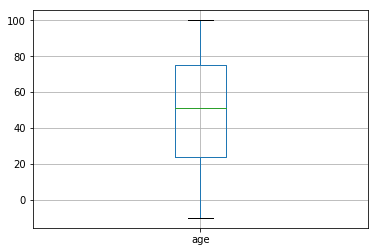

In [79]:
import matplotlib.pyplot as plt
data.boxplot(column = 'age')
plt.show()

Text(0.5, 1.0, 'Histogram of Age without outliers included')

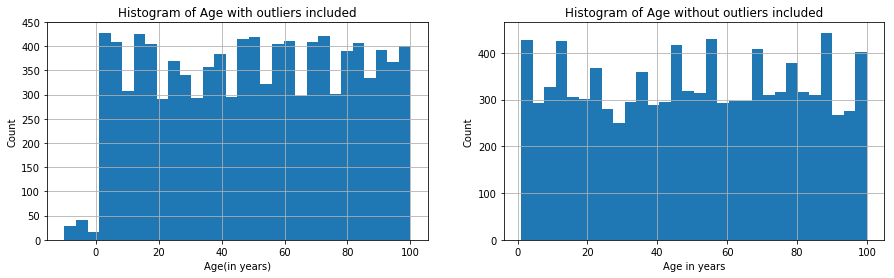

In [80]:
# define the figure with 2 subplots
fig,ax = plt.subplots(1,2,figsize = (15,4)) 

# histogram of the number of trip distance
data.age.hist(bins=30,ax=ax[0])
ax[0].set_xlabel('Age(in years)')
ax[0].set_ylabel('Count')
ax[0].set_title('Histogram of Age with outliers included')


v = data.age 
v[~(v<=0)].hist(bins=30,ax=ax[1]) # 

ax[1].set_xlabel('Age in years')
ax[1].set_ylabel('Count')
ax[1].set_title('Histogram of Age without outliers included')

### Categorical Data

In [81]:
data["cancer_type"].unique()

array(['blood', 'brain', 'colon', 'cervix', 'melanoma', 'kidney',
       'thyroid', 'prostate', 'breast', 'lung', 'ovary', 'liver', 'bone',
       'hypopharyngeal cancer', 'teeth', 'buttock', 'tongue', 'feet',
       'heart', 'armpit'], dtype=object)

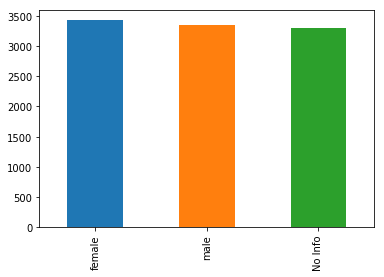

In [82]:
data['sex'].value_counts().plot(kind='bar') ##figsize=(15, 5) add this for more width 

In [83]:
### Removing small categories
print(data.shape)
cancer_type_count=data['cancer_type'].value_counts()
cancer_type_filtered=cancer_type_count[cancer_type_count>10]
print(cancer_type_filtered.index)
data=data[data['cancer_type'].isin(cancer_type_filtered.index)]
#data=data[data['cancer_type'].isin(['cervix', 'brain', 'hypopharyngeal cancer', 'kidney', 'ovary', 'breast',
#       'liver', 'blood', 'colon', 'prostate', 'thyroid', 'lung', 'melanoma'])]
data = data.reset_index(drop=True)
print(data.shape)

(10086, 7)
Index(['cervix', 'brain', 'hypopharyngeal cancer', 'kidney', 'ovary', 'breast',
       'liver', 'blood', 'colon', 'prostate', 'thyroid', 'lung', 'melanoma'],
      dtype='object')
(10041, 7)


### Bivariate Analysis

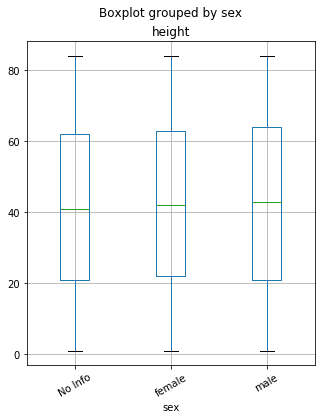

In [86]:
data.boxplot('height','sex',rot = 30,figsize=(5,6))

In [84]:
import numpy as np
data.pivot_table(values=['age'], index=["cancer_type"], aggfunc=np.mean)

,age
cancer_type,
blood,50.474903
brain,49.919699
breast,50.903185
cervix,48.596059
colon,48.845052
hypopharyngeal cancer,51.290201
kidney,48.571069
liver,50.973008
lung,49.761580


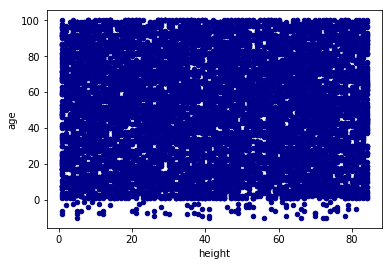

In [116]:
ax1 = data.plot.scatter(x='height',
                        y='age',
                        c='DarkBlue')

     age   max       mean  median   min        std
0    -10  73.0  52.166667    61.0   5.0  26.010895
1     -9  78.0  52.714286    53.0  26.0  18.544669
2     -8  65.0  26.571429    30.0   1.0  22.441458
3     -7  70.0  38.875000    33.0  11.0  22.228923
4     -6  76.0  39.615385    47.0   1.0  28.998674
5     -5  81.0  58.500000    62.0  21.0  20.397440
6     -4  76.0  45.777778    51.0   8.0  19.791272
7     -3  79.0  47.500000    56.5   2.0  27.994897
8     -2  72.0  39.111111    38.0   4.0  23.571405
9     -1  74.0  33.857143    23.0   5.0  29.498184
10     1  84.0  42.438017    42.0   1.0  22.563574
11     2  84.0  42.698113    42.0   1.0  24.091955
12     3  83.0  40.184466    38.0   1.0  24.487991
13     4  84.0  45.557895    48.0   1.0  24.680820
14     5  84.0  42.696078    40.0   4.0  22.763437
15     6  82.0  42.890110    45.0   1.0  24.775189
16     7  84.0  42.551020    41.5   1.0  24.443127
17     8  83.0  38.824561    37.5   1.0  25.122442
18     9  83.0  40.815534    43

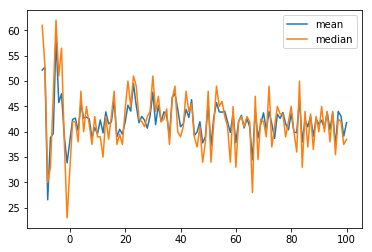

In [105]:
table1 = data.pivot_table(index='age', values='height',aggfunc=('mean','median','std','min','max')).reset_index()
print(table1)
table2=pd.DataFrame(table1[['age','mean','median']])
plt.plot( 'age', 'mean', data=table2)###, markerfacecolor='blue'), markersize=12, color='skyblue', linewidth=4)
plt.plot( 'age', 'median', data=table2)###, color='olive', linewidth=2)
#plt.plot( 'x', 'y3', data=df, marker='', color='olive', linewidth=2, linestyle='dashed', label="toto")
plt.legend()


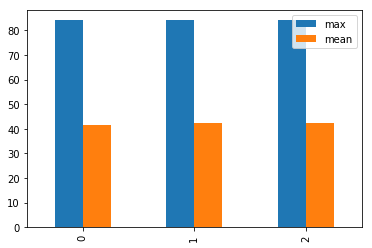

In [101]:
table1 = data.pivot_table(index='sex', values='height',aggfunc=('mean','median','std','min','max')).reset_index()
table2=pd.DataFrame(table1[['sex','max','mean']])
table2.plot(kind='bar')

In [106]:
cont_columns = []
cat_columns = []

for i in data.columns:
    if data[i].dtype != 'object':
        cont_columns.append(i)
    elif data[i].dtype == 'object':
        cat_columns.append(i)

In [108]:
cont_columns

['patient_id', 'age', 'height']

In [110]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

C:\Users\archi\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


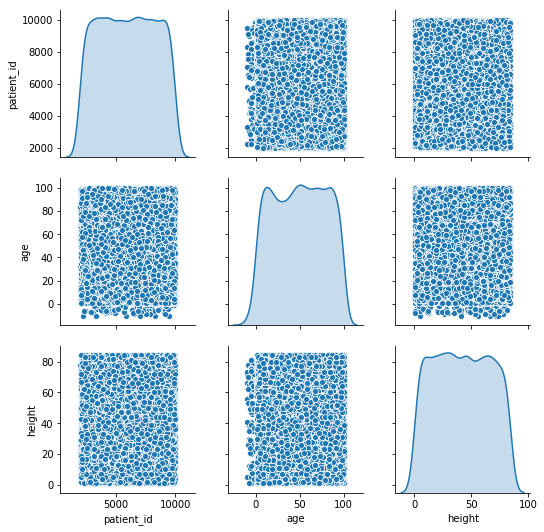

In [111]:
sns.pairplot(data[cont_columns], vars=['patient_id', 'age', 'height'], kind = 'scatter',diag_kind='kde')

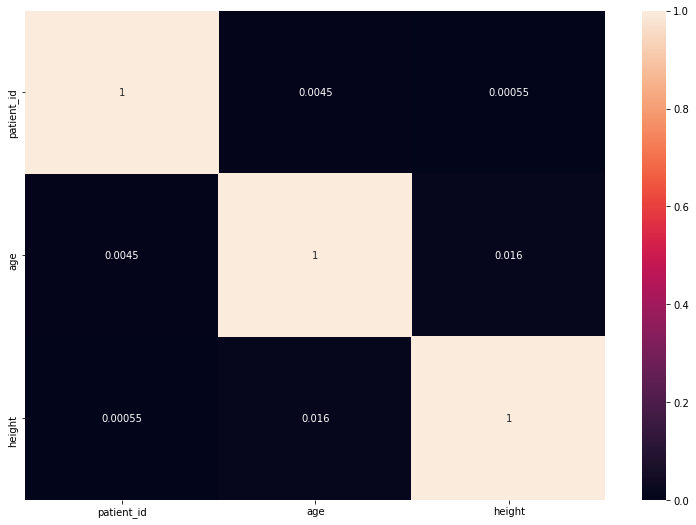

In [117]:
correlationMatrix = data[cont_columns].corr().abs()

plt.subplots(figsize=(13, 9))
sns.heatmap(correlationMatrix,annot=True)

# Mask unimportant features
sns.heatmap(correlationMatrix, mask=correlationMatrix < 1, cbar=False)
plt.show()

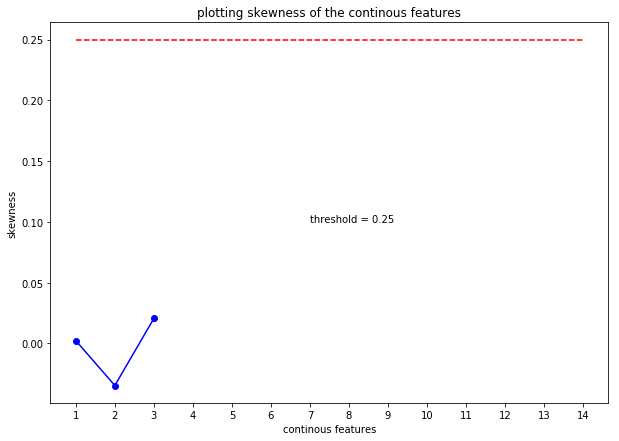

In [121]:
from scipy import stats

skewness_list = []
for cn in data[cont_columns].columns:
    skewness_list.append(stats.skew(data[cn]))

plt.figure(figsize=(10,7))
plt.plot(skewness_list, 'bo-')
plt.xlabel("continous features")
plt.ylabel("skewness")
plt.title("plotting skewness of the continous features")
plt.xticks(range(15), range(1,15,1))
plt.plot([(0.25) for i in range(0,14)], 'r--')
plt.text(6, .1, 'threshold = 0.25')
plt.show()